In [2]:
# MOUNT THE FLAGS FOLDER FROM GOOGLE DRIVE
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
# FETCH THE JPG IMAGES FROM FLAGS FOLDER AND APPEND AS FLAGS
import cv2
import glob
import numpy as np
from PIL import Image
flags = []
height =[]
width = []
files = glob.glob ("/content/gdrive/My Drive/flags/*.jpg")
for myFile in files:
    im = Image.open(myFile)
    #flags.append(im)
    image = cv2.imread (myFile)
    im_height = np.size(image, 0)
    im_width = np.size(image, 1)
    flags.append (image)
    height.append(im_height)
    width.append(im_width)
    #print(myFile)

#print(np.array(flags))
print('Flags shape:', np.array(flags).shape)
print('All heights: ', np.array(height).shape)
print('All widths: ', np.array(width).shape)
print('Maximum height: ', max(height))
print('Maximum width: ', max(width))

Flags shape: (100,)
All heights:  (100,)
All widths:  (100,)
Maximum height:  2183
Maximum width:  2183


X_data shape: (100, 2183, 2183, 3)


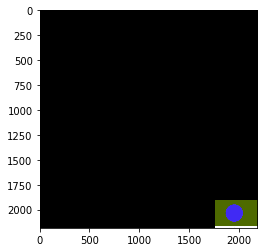

In [4]:
import cv2 # this is an image processing library that is used to read images
import glob
import numpy as np
import matplotlib.pyplot as plt

X_data = []
height =[]
width = []
files = glob.glob ("/content/gdrive/My Drive/flags/*.jpg")
for myFile in files:
    image = cv2.imread (myFile)
    im = Image.open(myFile)
    im_height = np.size(image, 0)
    im_width = np.size(image, 1)
    flags.append (image)
    height.append(im_height)
    width.append(im_width)
    
max_height = max(height)
max_weight = max(width)

files = glob.glob ("/content/gdrive/My Drive/flags/*.jpg")
for myFile in files:
    image = cv2.imread (myFile)
    padding_height = max_height - np.size(image, 0)
    padding_width = max_weight - np.size(image, 1)
    resized_image=cv2.copyMakeBorder(image,padding_height,0,padding_width,0,cv2.BORDER_CONSTANT,value=0)
    X_data.append (resized_image) 
    
print('X_data shape:', np.array(X_data).shape)
plt.imshow(X_data[4])
images_array = np.array(X_data)    # Now I can use this in my CNN

In [5]:
import numpy as np
print('X_data shape:', np.array(X_data).shape)
print (type(images_array))
print ('Flag dataset shape: ', images_array.shape)

X_data shape: (100, 2183, 2183, 3)
<class 'numpy.ndarray'>
Flag dataset shape:  (100, 2183, 2183, 3)


In [6]:
print (images_array[0:1, 0:1])

[[[[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]]]


In [0]:
# Split the data into Training Set and Validation Set
TRAIN_IMAGES = (images_array[:,])
TRAIN_LABELS = (images_array[:, 0:0, 0:0, 0:0])
VAL_IMAGES = (images_array[0:10,])
VAL_LABELS = (images_array[0:10, 0:0, 0:0, 0:0])


In [10]:
# Check how many images are in Training and Validation
print("Training dataset:")
print(TRAIN_IMAGES.shape)
print(TRAIN_LABELS.shape)
print('Validation dataset:')
print(VAL_IMAGES.shape)
print(VAL_LABELS.shape)

Training dataset:
(100, 2183, 2183, 3)
(100, 0, 0, 0)
Validation dataset:
(10, 2183, 2183, 3)
(10, 0, 0, 0)


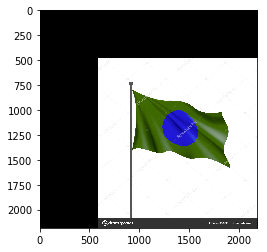

In [12]:
# Visualize a random image (for eg, 0th image) in the training dataset
import matplotlib.pyplot as plt
plt.imshow(TRAIN_IMAGES[6], cmap = 'gray')
plt.show()

In [14]:
# Verify that the "true" label is correct
print(TRAIN_LABELS[60])
TRAIN_LABELS[0]
#X_data[6]

[]


array([], shape=(0, 0, 0), dtype=uint8)

In [11]:
# Reformat the datasets (to feed data to model we build)
train_images = TRAIN_IMAGES.reshape((100, 1463, 2000, 3, 1))
train_images = TRAIN_IMAGES.astype('float32') / 255
val_images = VAL_IMAGES.reshape((10, 1463, 2000, 3, 1))
val_images = VAL_IMAGES.astype('float32') / 255

ValueError: ignored

In [0]:
# Convert our labels accordingly
from keras.utils import to_categorical
print("Before: ")
print(TRAIN_LABELS.shape)
TRAIN_LABELS[0]
train_labels = to_categorical(TRAIN_LABELS)
val_labels = to_categorical(VAL_LABELS)
print("After: ")
print(train_labels.shape)
train_labels[0]

Before: 
(7, 0, 0, 0)


ValueError: ignored

In [0]:
# Create a NN with architecture
# FIRST LAYER HAS 64 FILTERS, EACH OF SIZE 3X3
# LAST LAYER IS OF 1 NEURONS, ONE FOR ONE LABELS
from keras import layers, models
model = models.Sequential()
model.add( layers.Conv2D( 64, ( 3, 3 ), activation = 'relu', input_shape = train_images[0, :, :, :].shape ) )
#model.add( layers.Flatten() )
model.add( layers.Dense( 1, activation = 'softmax' ) )
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 1461, 1998, 64)    1792      
_________________________________________________________________
dense_2 (Dense)              (None, 1461, 1998, 1)     65        
Total params: 1,857
Trainable params: 1,857
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Compile and do the training
from keras import layers, models
model = models.Sequential()
model.compile( optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )
model.fit(train_images, train_labels, epochs = 10, batch_size = 100 )

Instructions for updating:
Colocations handled automatically by placer.


NameError: ignored

In [0]:
# Evaluate model on validation set
validation_loss, validation_acc = model.evaluate( val_images, VAL_LABELS)
print( 'validation_acc:', validation_acc )

ValueError: ignored